In [86]:
#imports
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score


In [58]:
#read data using pandas
data = pd.read_csv("sp500_27270.csv")

#Filtering data satisfying correlation >=0.95 or <=-0.95
filtered_companies = []
correlation = data.corr()
for i in range(len(correlation)):
    if(correlation['SP500'][i]>=0.95 or correlation['SP500'][i]<=-0.95):
        filtered_companies.append(correlation['SP500'].keys().values[i])

#extracting the columns of the companies satisfying the correlation limits
filtered_data = data.filter(filtered_companies)

#specifying the inputs (columns of companies stock prices)
#specifying our output as the SP500 index column
Y = np.array(filtered_data['SP500'])
X = np.array(filtered_data.drop(columns=['SP500']))

#divide the dataset into training and testing sets in the ratio 80:20, 
#training data will later be furthered splitted into training and validation
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Normalizing Data (using mean and standard deviation)
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)

#divide the scaled dataset into training and testing sets in the ratio 80:20
X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled = train_test_split(X_scaled,Y_scaled,test_size=0.2)

In [52]:
#We define four classifiers with the best params of the grid search 
#but varying the solver and the learning rate as requested
#we try both solvers 'sgd' and 'adam' each with learning rates '0.01' and '0.1' 
#then we plot the best architecture. For each architecture we use the scoring metric of mean square log error
#justification for parameters and scoring metrics used later at the end


#define the MLP regressor with solver sgd and learning rate 0.1
regressor = MLPRegressor(solver='sgd', hidden_layer_sizes=(1024,2), learning_rate='adaptive',learning_rate_init=0.1,
                         validation_fraction=0.25, alpha=0.001, max_iter=3000, early_stopping=True)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
MSLE = mean_squared_log_error(Y_test, predictions)
print("Regressor with SGD solver and 0.1 learning rate: ")
print("Mean Square Log Error:", MSLE)
print()
 
    
#define the MLP regressor with solver sgd and learning rate 0.01
regressor = MLPRegressor(solver='sgd', hidden_layer_sizes=(1024,2), learning_rate='adaptive',learning_rate_init=0.01,
                         validation_fraction=0.25, alpha=0.001, max_iter=3000, early_stopping=True)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
MSLE = mean_squared_log_error(Y_test, predictions)
print("Regressor with SGD solver and 0.01 learning rate: ")
print("Mean Square Log Error for Sgd:", MSLE)
print()
 



Regressor with SGD solver and 0.1 learning rate: 
Mean Square Log Error: 0.01741103293318664

Regressor with SGD solver and 0.01 learning rate: 
Mean Square Log Error for Sgd: 0.01741028279358176



In [43]:
#define the MLP regressor with solver adam and learning rate 0.1
regressor = MLPRegressor(solver='adam', hidden_layer_sizes=(1024,2), learning_rate='adaptive',learning_rate_init=0.1,
                         validation_fraction=0.25, alpha=0.001, max_iter=3000, early_stopping=True)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
MSLE = mean_squared_log_error(Y_test, predictions)
print("Regressor with ADAM solver and 0.1 learning rate: ")
print("Mean Square Log Error:", MSLE)
print()
 
    


Regressor with ADAM solver and 0.1 learning rate: 
Mean Square Log Error: 0.015829253532634455



In [54]:
#define the MLP regressor with solver adam and learning rate 0.01
regressor = MLPRegressor(solver='adam', hidden_layer_sizes=(1024,2), learning_rate='adaptive',learning_rate_init=0.01,
                         validation_fraction=0.25, alpha=0.001, max_iter=3000, early_stopping=True)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
MSLE = mean_squared_log_error(Y_test, predictions)
print("Regressor with ADAM solver and 0.01 learning rate: ")
print("Mean Square Log Error:", MSLE)
print()

Regressor with ADAM solver and 0.01 learning rate: 
Mean Square Log Error: 0.0005010408038243095



Text(0.5,1,'S&P VS Company')

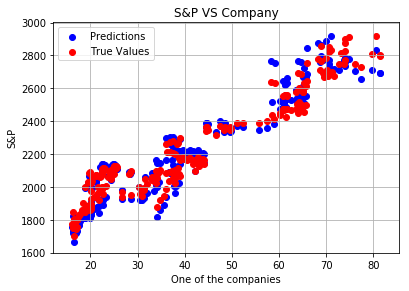

In [60]:
#we plot both the true and predicted values against the input data to compare between them
fig = plt.figure()
ax = fig.add_axes([1,0.1,0.8,0.8])
ax.scatter(X_test[:,1], predictions, c='b', label='Predictions')
ax.scatter(X_test[:,1], Y_test, c='r', label='True Values')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('One of the companies')
ax.set_ylabel('S&P')
ax.set_title('S&P VS Company')



In [ ]:
#-----------TASK 1 ANALYSIS ----------------
#First, we divided dataset into training and testing in the ratio 80:20
#then we specified that 25% of this 80 will be for validation so final ratio is 60:20:20
#For the scoring metrics, We used mean squared log error instead of the mean squared error because the output range in this task is so large
#thus mean squared error will penalize the error a lot but mean squared log error squishes the range by applying the log function
#we trained our neural network using different solvers (sgd & adam) and different learning rates (0.01 and 0.1)
#we calculated the mean squared log error for each regressor
#For regularization, we used alpha term = 0.001 
#and we also applied early stopping so that we stop before memorization starts and validation error increases

#Adam optimizer was better in this task as it got less mean squared log error than SGD in both regressors
#What makes adam better in a lot of machine learning algorithm is that 
#in addition to storing an exponentially decaying average of past "squared" gradients (v) like other optimizers, 
#Adam also keeps an exponentially decaying average of past gradients (m), similar to momentum so it decays more slowly
#giving it the change to be better at remembering past gradients then it use both to updated the weights

#For the best architecture, We plotted the predicted values versus the true values
#The true and predicted values start to mismatch more at the larger values (top right) 
#where the error values get larger since the predicted values are larger 
#so a mispredict is likely to affect the error function more 
#leading to a larger distance between the true and the predicted values on the graph.




# TASK 2

In [70]:
#sort the dataframe by the SP500 index value descendingly
sorted_dataframe = correlation.sort_values(['SP500'], ascending=False)

#drop the value of the first row (one with the maximum SP500 value in the SP500 column) 
#since this represents the correlation of SP500 with itself. We actually looking for the most correlated company
#which will be the second highest value in the SP500 index column
sorted_dataframe = sorted_dataframe[1:]

#extract the company name (the key) of this maximum value
maximum_company = sorted_dataframe['SP500'].keys().values[0]

#extract the column of this maximum company from the data frame
maximum_company_data = data[maximum_company]

#initialize empty arrays for inputs and output
X = []
Y = []

#loop over the whole column
#in each iteration append 5 values representing days from (t-4 till t) to the input array
#and the following 4 values representing days (t+1 till t+4) to the output array
#shift the dataframe to the left by 1 step (-1) to take following values
for value in range(0,len(maximum_company_data)-9):
    x_element = list(maximum_company_data[:5])
    y_element = list(maximum_company_data[5:9])
    X.append(x_element)
    Y.append(y_element)
    maximum_company_data = maximum_company_data.shift(-1)
    


#divide the dataset into training and testing sets with ratio 80:20
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2)



In [71]:
#define the MLP regressor with maximum iterations
regressor = MLPRegressor(max_iter=3000)

#specifying the different parameters to perform the grid search on
param_grid = {'hidden_layer_sizes': [(128,2),(1024,2)], 'learning_rate':['adaptive'],'activation':['tanh', 'relu'], 'solver':['sgd', 'adam'],
             'learning_rate_init':[0.01],  'early_stopping':[True]}


#perform gridsearch on all possible combinations of parameters with cross validation division
clf = GridSearchCV(regressor, param_grid=param_grid, cv=3, verbose=20, scoring= "neg_mean_squared_error")
clf.fit(X_train,Y_train)

#print the best architecture parameters and the score
print("Grid Search best parameters:")
print(clf.best_params_)
print("Mean Squared Error Score: ", clf.score(X_test, Y_test))



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-281.1911083768576, total=   0.1s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-255.38963527204783, total=   0.1s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-263.18387518562497, total=   0.1s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-288.25241203188625, total=   3.4s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-258.7236109005222, total=   2.9s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-257.2076289164908, total=   3.4s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.1s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-278.35563722398024, total=   0.4s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.5s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-341.6683670836052, total=   0.5s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.0s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-297.67236533596656, total=   0.5s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.5s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-284.91415370427427, total=  14.6s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   26.1s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-257.2236169209939, total=  11.9s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   38.0s remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-257.09483989048385, total=  14.8s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-278.70604876531144, total=   0.1s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-26479571446597.766, total=   0.1s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   52.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   52.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   53.0s remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-258.16169820849615, total=   0.1s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-1.5371457773177248, total=   0.2s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   53.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   53.3s remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-1.7442886312581427, total=   0.1s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   53.4s remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(128, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-257.49446485097025, total=   9.4s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-160662454407.92703, total=   0.2s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.0min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-16657185587.71732, total=   0.3s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd, score=-258.24869958000977, total=   0.3s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam, score=-285.1111923300308, total=  30.3s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.01, solver=adam 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024,

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.5min finished


In [76]:

#After running our grid search on different options for activation, hidden layer sizes, solvers, learning rates
#we show the results and then we define a regressor with the best parameters to get the predictions and calculate Mean square error
#and then we display the results of the first 3 instances of the predictions vs the true ones
#Best Parameters were: 
#Activation: relu, Hidden layer sizes: (128,2), learning rate init: 0.01 and adaptive, solver: adam


#define the MLP regressor with max iterations using best params from GridSearch, splitting training set into training and validation
regressor = MLPRegressor(solver='adam', hidden_layer_sizes=(128,2), validation_fraction=0.25, learning_rate='adaptive', activation='relu', learning_rate_init=0.01, max_iter=5000, early_stopping=True)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
MSE = mean_squared_error(Y_test, predictions)
print("Mean Square Error for GridSearch Best Parameters using Adam:", MSE)
 

Mean Square Error for GridSearch Best Parameters using Adam: 1.8629000164891578


In [77]:
#DISPLAY (as requested) The predicted values from the classifier with the best parameters against the true values
for i in range(3):
    print("Instance ", i+1, " predicted days: ")
    print("Day 1 : Actual Values = ", Y_test[i][0], "VS True Value=", predictions[i][0])
    print("Day 2 : Actual Values = ", Y_test[i][1], "VS True Value=", predictions[i][1])
    print("Day 3 : Actual Values = ", Y_test[i][2], "VS True Value=", predictions[i][2])
    print("Day 4 : Actual Values = ", Y_test[i][3], "VS True Value=", predictions[i][3])
    print()

    

Instance  1  predicted days: 
Day 1 : Actual Values =  49.8356 VS True Value= 49.775578816758085
Day 2 : Actual Values =  50.2441 VS True Value= 49.388029182360135
Day 3 : Actual Values =  50.6818 VS True Value= 49.319636765191696
Day 4 : Actual Values =  50.5067 VS True Value= 49.34851963665131

Instance  2  predicted days: 
Day 1 : Actual Values =  41.2652 VS True Value= 41.76133126011954
Day 2 : Actual Values =  41.3947 VS True Value= 41.13971611312839
Day 3 : Actual Values =  41.8215 VS True Value= 41.058132929353796
Day 4 : Actual Values =  41.7351 VS True Value= 41.037211452676544

Instance  3  predicted days: 
Day 1 : Actual Values =  74.0995 VS True Value= 74.90002944452631
Day 2 : Actual Values =  73.882 VS True Value= 75.24626889927869
Day 3 : Actual Values =  73.5261 VS True Value= 75.21922918078803
Day 4 : Actual Values =  74.2281 VS True Value= 75.4042473446715



In [ ]:
#------------------ TASK 2 ANALYSIS -------------------------
# For scoring metric, this time we used Mean Squared Error since the range of output values is not as large as task 1
#and keeping in mind that Mean Squared Log error is much computational expensive for doing the log operations
#so since the mean squared error function is not large enough to labour such complexity of the log error, we used the mean squared error metric
#We performed our grid search on a lot of permutatiaons to get the best architecture 
#whose values were indicated and used in the following regressor to get the actual predictions
#Then, we displayed for the first 3 instances the predicted values against the true ones for the predicted coming 4 days for each instance
#As seen, the values were somehow close to the true ones which indicate that using the mean squared error here was a good choice.



# TASK 3

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

#read reviews dataset from json file
reviews_dataset = pd.read_json("../reviews_Digital_Music_5.json", lines=True)
dataset_grouped_by_rating = reviews_dataset.groupby(['overall']).count()['reviewerID']

#group dataset rows by the overall rating to display the count of each class
print(dataset_grouped_by_rating) 

overall
1     2791
2     3010
3     6789
4    16536
5    35580
Name: reviewerID, dtype: int64


In [80]:
#we get iteratively the counts of each rating and then we take the first 2500 reviews only, to balance the dataset
rating = reviews_dataset[reviews_dataset['overall']==1]
result = rating[:2500]

for i in range(2,6):
    rating = reviews_dataset[reviews_dataset['overall']==i]
    rating_cut = rating[:2500]
    result = pd.concat([result, rating_cut])
    


In [75]:
#We extract the review text column as our input and the overall rating column as our output
Y = np.array(reviews_dataset['overall'])
X = np.array(reviews_dataset['reviewText'])

#divide the dataset into training and testing sets with ratio 80:20
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [81]:
#Calculate the tf-idf matrix for each review text
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

In [82]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (128,2)
classifier = MLPClassifier(hidden_layer_sizes=(128,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_128 = classifier.predict(X_test_transformed)
accuracy_128 = accuracy_score(Y_test, predictions_128)
print("Accuracy Score for layers (128,2): ", accuracy_128)


Accuracy Score for layers (128,2):  0.6219286045433472


In [16]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (1024,2)
classifier = MLPClassifier(hidden_layer_sizes=(1024,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_1024 = classifier.predict(X_test_transformed)
accuracy_1024 = accuracy_score(Y_test, predictions_1024)
print("Accuracy Score for layers (1024,2): ", accuracy_1024)


Accuracy Score for layers (1024,2):  0.5882398392829548


In [21]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (512,128,2)
classifier = MLPClassifier(hidden_layer_sizes=(512,128,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_512_128 = classifier.predict(X_test_transformed)
accuracy_512_128 = accuracy_score(Y_test, predictions_512_128)
print("Accuracy Score for layers (512,128,2): ", accuracy_512_128)


Accuracy Score for layers (512,128,2):  0.5985937258538093


In [23]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (1024,128,2)
classifier = MLPClassifier(hidden_layer_sizes=(1024,128,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_1024_128 = classifier.predict(X_test_transformed)
accuracy_1024_128 = accuracy_score(Y_test, predictions_1024_128)
print("Accuracy Score for layers (1024,128,2): ", accuracy_1024_128)

Accuracy Score for layers (1024,128,2):  0.5890897851954876


In [28]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (128,128,2)
classifier = MLPClassifier(hidden_layer_sizes=(128,128,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_128_128 = classifier.predict(X_test_transformed)
accuracy_128_128 = accuracy_score(Y_test, predictions_128_128)
print("Accuracy Score for layers (128,128,2): ", accuracy_128_128)

Accuracy Score for layers (128,128,2):  0.5917168907433163


In [30]:
#Define a classifier with alpha value for requarization with early stopping option to stop before increase of validation error
#Hidden layers of sizes (256,128,2)
classifier = MLPClassifier(hidden_layer_sizes=(256,128,2) ,alpha=0.0001, validation_fraction=0.25, max_iter=30000, 
                           activation='tanh', solver='adam', early_stopping=True)
classifier.fit(X_train_transformed, Y_train)
predictions_256_128 = classifier.predict(X_test_transformed)
accuracy_256_128 = accuracy_score(Y_test, predictions_256_128)
print("Accuracy Score for layers (256,128,2): ", accuracy_256_128)


Accuracy Score for layers (256,128,2):  0.5910987482614742


In [ ]:
#Hidden layer sizes investigated: (128,2), (1024,2), (512,128,2), (1024,128,2), (128,128,2), (256,128,2)
#Thus the best architecture was the one with: hidden_layer_sizes(128,2), activation: 'tanh', solver: 'adam', alpha=0.0001
#Worst Architecture tried was: hidden_layer_sizes(1024,2), activation: 'tanh', solver: 'adam', alpha=0.0001

In [83]:
#we plot the normalized confusion matrix for the best architecture

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.58 0.   0.14 0.13 0.15]
 [0.28 0.   0.29 0.28 0.15]
 [0.09 0.   0.21 0.41 0.28]
 [0.01 0.   0.05 0.28 0.67]
 [0.01 0.   0.01 0.07 0.91]]


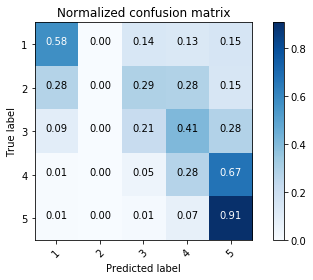

In [87]:
import itertools
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
confusion_matrix = confusion_matrix(Y_test, predictions_128)
np.set_printoptions(precision=2)
class_names = sorted(list(reviews_dataset.overall.unique()))
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
#Confusion Matrix Comments
#This matrix has the correctly diagonal blocks as the correctly classified classes, so the higher diagonal values the better
#since it is normalized so values range from 0-->1
#It is obvious that the best classified class is the reviews with rating 5 (0.91 score), 
#the second best is those with rating 1 (0.58 score)
#which are the best and the worst ratings. this means that the classifier is good at predicting the extremes
#if a review is too good, it will probably contain very descriptive words that help classify (e.x: amazing, wonderful, best)
#and vice versa
#if it is too bad it will contain words that is descriptive enough to show it is bad review (e.x: awful, worst,)
#the classes in the middle are the worst to be predicted (classes with ratings=2,3,4) 
#class 2 is the worst(0 score) ->(none is correctly classified), class 3 with (0.21 score) and class 4 with 0.28 score
#Probably because the reviews ratings in the middle does not have disctinct words 
#as the extremes that can help the classifier to correctly idenfity them

In [ ]:
#-------------- TASK 3 ANALYSIS --------------------
#We splitted the data into training and testing sets with ration 80:20 
#then we splitted the training into training and validation sets in ratio 75:25 so overall splitting ration is 60:20:20
#We used the accuracy as our scoring metric since this is a multi-classification problem 
#If it is a binary classification problem with unbalanced data then precision and recall might be better
#but since this is a multi-classification problem and we already balanced our dataset so accuracy can do well
#The output activation function used is "Softmax". We didn't specify it ourselves. 
#It is the default output activation that Sklean uses since it is used in classification problem 
#to relate the output nodes together making sure their outputs sums up to 1 since a classification problem should ouptut
#the probability of each class relative to the other options then it selects the output node with the maximum probability
#to be the predicted output of the whole network.
